<div style="background-color: #eaf2f8; border-left: 6px solid #1f618d; padding: 10px;">
  <h2 style="color: #D35400;">📦 Data Product Release Files: NSIDC DAAC Best Practices</h2>
  <p style="color: #154360; font-size: 16px;">
    <strong>
      Preparing Data Release Files as per recommended NASA National Snow and Ice Data Center Distributed Active Archive Center (NSIDC DAAC) Best Practices Guidelines for Preliminary Metadata and Product Delivery
    </strong>
  </p>
</div>


<div style="background-color: #fdf2e9; border-left: 6px solid #d35400; padding: 15px; border-radius: 6px;">

<h3 style="color: #d35400;">📘 Overview</h3>

<p style="color: #4b2c20; font-size: 15px;">
  This Jupyter Notebook outlines the process of preparing data release files following the official guidelines provided by the 
  <strong>NASA National Snow and Ice Data Center Distributed Active Archive Center (NSIDC DAAC)</strong>. 
  The focus is on structuring core data variables and generating standardized metadata to enable seamless data product delivery and archival.
</p>

<p style="color: #4b2c20; font-size: 15px;">
  For detailed specifications on NetCDF attribute formatting, please refer to the official NSIDC guidelines: <br>
  <a href="https://nsidc.org/sites/default/files/documents/other/nsidc-guidelines-netcdf-attributes.pdf" target="_blank">
    NSIDC Guidelines for NetCDF Attributes (PDF)
  </a>
</p>

<h4 style="color: #d35400;">🗺️ Compatibility</h4>

<p style="color: #4b2c20; font-size: 15px;">
  The resulting NetCDF files are fully compatible with standard GIS platforms like <strong>QGIS</strong>, and scientific visualization tools such as 
  <strong>Panoply</strong>, ensuring broad usability for geospatial analysis and scientific interpretation.
</p>

</div>


In [1]:
# Load dependencies
import os
import numpy as np
import xarray as xr
import scipy.io
from datetime import datetime

<div style="background-color: #fdf2e9; border-left: 6px solid #d35400; padding: 15px; border-radius: 6px;">

<h3 style="color: #d35400;">📥 Load the Data and Metadata for NetCDF Conversion</h3>

<ol style="color: #4b2c20; font-size: 15px;">
  <li>
    The sample dataset used in this workflow is: <br>
    <strong>SMAP-Derived 9-km EASE-Grid Surface Soil Permittivity and Vegetation Optical Depth over Snow-Covered Regions, Version 1</strong>  
    <br>
    <a href="https://github.com/aebtehaj/SM-Snow-L-band" target="_blank">GitHub Repository</a>
  </li>
  <li>
    This data product provides daily estimates of:
    <ul>
      <li>Surface soil permittivity</li>
      <li>Vegetation Optical Depth (VOD)</li>
    </ul>
    at a spatial resolution of <strong>9 km</strong> across snow-covered regions. The parameters are retrieved from SMAP L-band brightness temperatures using the <strong>Tau-Omega-Snow (TO-Snow)</strong> emission model — an enhancement of the classical tau-omega approach to incorporate snow layer effects.
  </li>
  <li>
    The dataset has been validated using multiple ancillary data sources, including:
    <ul>
      <li>Ground temperature</li>
      <li>Above-ground biomass</li>
      <li>Tree height</li>
      <li>Net ecosystem exchange of carbon dioxide</li>
    </ul>
  </li>
</ol>

<p style="color: #7e5109; font-size: 14px;"><strong>References:</strong></p>
<ul style="color: #4b2c20; font-size: 14px;">
  <li><a href="https://ieeexplore.ieee.org/abstract/document/9927161" target="_blank">Passive microwave retrieval of soil moisture below snowpack at L-band using smap observations</a></li>
  <li><a href="https://www.sciencedirect.com/science/article/pii/S0034425724001561" target="_blank">Global estimates of L-band vegetation optical depth and soil permittivity of snow-covered boreal forests and permafrost landscape using SMAP satellite data</a></li>
</ul>

</div>


In [5]:
# Load the .npz file
data = np.load('TO_SNOW_20170123.npz')

# Load each variable
VOD = data['VOD']
soil_permittivity= data['soil_permittivity']
flag_retrieved = data['flag_retrieved']
flag_uncertainty = data['flag_uncertainty']

# Load Metadata
data = np.load('smap_data.npz', allow_pickle=True)
SMAP = data['SMAP'].item()
latitude = data['latitude']
longitude = data['longitude']
time = data['time']

# Replace NaNs with fill values
fill_value = -9999
latitude[np.isnan(latitude)] = fill_value
longitude[np.isnan(longitude)] = fill_value
time[np.isnan(time)] = fill_value

<div style="background-color: #fdf2e9; border-left: 6px solid #d35400; padding: 15px; border-radius: 6px;">

<h3 style="color: #d35400;">🛠️ Creating NetCDF Files Following NASA Standards</h3>

<p style="color: #4b2c20; font-size: 15px;">
  This section details the steps for generating <strong>NetCDF files</strong> that comply with the metadata and formatting standards established by NASA and NSIDC DAAC. Adhering to these guidelines ensures consistency, discoverability, and interoperability within the Earth science data community.
</p>

<p style="color: #4b2c20; font-size: 15px;">
  For official documentation and standards, refer to:
  <ul style="color: #4b2c20; font-size: 15px;">
    <li><a href="https://www.earthdata.nasa.gov/about/standards" target="_blank">NASA Earth Science Data Standards</a></li>
    <li><a href="https://nsidc.org/sites/default/files/documents/other/nsidc-guidelines-netcdf-attributes.pdf" target="_blank">NSIDC Guidelines for NetCDF Attributes (PDF)</a></li>
  </ul>
</p>

</div>


In [6]:
# Define output NetCDF file path
date_str = '20170123'
output_file = os.path.join( f"EASE2_9km_SMAP_TOSNOW_SP_VOD_{date_str}.nc")

# Create xarray dataset
ds_out = xr.Dataset(
    {
        "VOD": (["y", "x"], VOD),
        "soil_permittivity": (["y", "x"], soil_permittivity),
        "flag_retrieved": (["y", "x"], flag_retrieved),
        "flag_uncertainty": (["y", "x"], flag_uncertainty),
        "latitude": (["y", "x"], latitude),
        "longitude": (["y", "x"], longitude),
        "tb_time_seconds": (["y", "x"], time)
    },
    coords={
        "y": ("y", np.linspace(7314540.83668457, -7314540.83668457, VOD.shape[0])),
        "x": ("x", np.linspace(-17367530.44516138, 17367530.44516138, VOD.shape[1]))
    },
    attrs={
        "title": "SMAP-Derived 9-km Ease grid Surface Soil Permittivity and Vegetation Optical Depth over Snow-Covered Regions, Version 1",
        "summary": "This dataset contains daily surface soil permittivity and vegetation optical depth (VOD) at 9 km resolution over snow-covered regions.",
        "Conventions": "CF-1.8",
        "source": "Soil Moisture Active Passive Instrument (SMAP)",
        "keywords": "EARTH SCIENCE > SPECTRAL/ENGINEERING > MICROWAVE > BRIGHTNESS TEMPERATURE > VEGETATION OPTICAL DEPTH, PERMITTIVITY",
        "geospatial_bounds" : "POLYGON((85.044 -180.0, -85.044 -180.0, -85.044 180.0, 85.044 180.0, 85.044 -180.0))",
        "time_coverage_start" : f"{datetime.strptime(date_str, '%Y%m%d').strftime('%Y-%m-%d')}T00:00:00.000Z",
        "time_coverage_end" : f"{datetime.strptime(date_str, '%Y%m%d').strftime('%Y-%m-%d')}T23:59:59.999Z",
        "date_modified": datetime.now().strftime('%Y-%m-%d')
    }
)

# Assign attributes for variables
ds_out["VOD"].attrs = {
    "long_name": "Vegetation Optical Depth",
    "units": "1",
    "grid_mapping": "crs",
    "comment": "The measured opacity of the vegetation over snow covered regions in the SMAP 9 km EASE grid cell on the descending overpass (6 AM)."
}

ds_out["soil_permittivity"].attrs = {
    "long_name": "Ground Permittivity",
    "units": "1",
    "grid_mapping": "crs",
    "comment": "The measured ground permittivity under snow covered regions in the SMAP 9 km EASE grid cell on the descending overpass (6 AM)."
}

ds_out["flag_retrieved"].attrs = {
    "long_name": "Flag Retrieved",
    "standard_name": "status_flag",
    "units": "1",
    "flag_values": np.array([0, 1], dtype=np.int8),
    "flag_meanings": "smap_dca_imported retrieved_using_to_snow_model",
    "grid_mapping": "crs",
    "comment": "Binary flag where 1 indicates a VOD retrieval from the TO-snow model, and 0 indicates a VOD value from the SMAP DCA product (vegetation_opacity_dca)."
}

ds_out["flag_uncertainty"].attrs = {
    "long_name": "Flag Uncertainty",
    "standard_name": "quality_flag",
    "units": "1",
    "flag_values": np.array([0, 1], dtype=np.int8),
    "flag_meanings": "good_quality uncertain_wet_snow_conditions",
    "grid_mapping": "crs",
    "comment": "Binary flag where 0 indicates good quality TO-snow model retrieval, and 1 indicates uncertain retrieval due to wet snow."
}

ds_out["latitude"].attrs = {
    "long_name": "Latitude of the center of the Earth based grid cell.",
    "units": "degrees_north",
    "comment": "Latitude of the center of a 9 km EASE-Grid 2.0 cell"
}

ds_out["longitude"].attrs = {
    "long_name": "Longitude of the center of the Earth based grid cell.",
    "units": "degrees_east",
    "comment": "Longitude of the center of a 9 km EASE-Grid 2.0 cell"
}

ds_out["tb_time_seconds"].attrs = {
    "long_name": "Arithmetic average of the acquisition time of all of the brightness temperature footprints with a center that falls within the EASE grid cell in seconds since noon on January 1, 2000 UTC.",
    "units": "seconds",
    "grid_mapping": "crs",
    "comment": "Arithmetic average of the acquisition time of all of the brightness temperature footprints with a center that falls within the EASE grid cell in seconds since noon on January 1, 2000 UTC."
}

ds_out.x.attrs = {
    "standard_name": "projection_x_coordinate",
    "long_name": "x",
    "units": "metre",
    "axis": 'X',
    "coverage_content_type": "coordinate",

}

ds_out.y.attrs = {
    "standard_name": "projection_y_coordinate",
    "long_name": "y",
    "units": "metre",
    "axis": 'Y',
    "coverage_content_type": "coordinate",

}

# Add the correct CRS for NSIDC EASE-Grid 2.0 (EPSG:6933)
#ds_out.attrs["grid_mapping"] = "crs"
ds_out["crs"] = xr.DataArray(0 , attrs={
    "grid_mapping_name": "lambert_cylindrical_equal_area",
    "longitude_of_central_meridian": 0.0,
    "standard_parallel": 30.0,
    "false_easting": 0.0,
    "false_northing": 0.0,
    "semi_major_axis": 6378137.0,
    "inverse_flattening": 298.257223563,
    "spatial_ref": "PROJCRS[\"WGS 84 / NSIDC EASE-Grid 2.0 Global\",BASEGEOGCRS[\"WGS 84\",ENSEMBLE[\"World Geodetic System 1984 ensemble\",MEMBER[\"World Geodetic System 1984 (Transit)\"],MEMBER[\"World Geodetic System 1984 (G730)\"],MEMBER[\"World Geodetic System 1984 (G873)\"],MEMBER[\"World Geodetic System 1984 (G1150)\"],MEMBER[\"World Geodetic System 1984 (G1674)\"],MEMBER[\"World Geodetic System 1984 (G1762)\"],MEMBER[\"World Geodetic System 1984 (G2139)\"],MEMBER[\"World Geodetic System 1984 (G2296)\"],ELLIPSOID[\"WGS 84\",6378137,298.257223563,LENGTHUNIT[\"metre\",1]],ENSEMBLEACCURACY[2.0]],PRIMEM[\"Greenwich\",0,ANGLEUNIT[\"degree\",0.0174532925199433]],ID[\"EPSG\",4326]],CONVERSION[\"US NSIDC EASE-Grid 2.0 Global\",METHOD[\"Lambert Cylindrical Equal Area\",ID[\"EPSG\",9835]],PARAMETER[\"Latitude of 1st standard parallel\",30,ANGLEUNIT[\"degree\",0.0174532925199433],ID[\"EPSG\",8823]],PARAMETER[\"Longitude of natural origin\",0,ANGLEUNIT[\"degree\",0.0174532925199433],ID[\"EPSG\",8802]],PARAMETER[\"False easting\",0,LENGTHUNIT[\"metre\",1],ID[\"EPSG\",8806]],PARAMETER[\"False northing\",0,LENGTHUNIT[\"metre\",1],ID[\"EPSG\",8807]]],CS[Cartesian,2],AXIS[\"easting (X)\",east,ORDER[1],LENGTHUNIT[\"metre\",1]],AXIS[\"northing (Y)\",north,ORDER[2],LENGTHUNIT[\"metre\",1]],USAGE[SCOPE[\"Environmental science - used as basis for EASE grid.\"],AREA[\"World between 86°S and 86°N.\"],BBOX[-86,-180,86,180]],ID[\"EPSG\",6933]]",
    "GeoTransform": "-17367530.44516138 9008.05 0 7314540.83668457 0 -9008.05",
    "EPSG": 6933,
    #"geographic_crs_name" : "WGS 84",
    #"horizontal_datum_name" : "WGS_1984",
    "crs_wkt": "PROJCRS[\"WGS 84 / NSIDC EASE-Grid 2.0 Global\",BASEGEOGCRS[\"WGS 84\",ENSEMBLE[\"World Geodetic System 1984 ensemble\",MEMBER[\"World Geodetic System 1984 (Transit)\"],MEMBER[\"World Geodetic System 1984 (G730)\"],MEMBER[\"World Geodetic System 1984 (G873)\"],MEMBER[\"World Geodetic System 1984 (G1150)\"],MEMBER[\"World Geodetic System 1984 (G1674)\"],MEMBER[\"World Geodetic System 1984 (G1762)\"],MEMBER[\"World Geodetic System 1984 (G2139)\"],MEMBER[\"World Geodetic System 1984 (G2296)\"],ELLIPSOID[\"WGS 84\",6378137,298.257223563,LENGTHUNIT[\"metre\",1]],ENSEMBLEACCURACY[2.0]],PRIMEM[\"Greenwich\",0,ANGLEUNIT[\"degree\",0.0174532925199433]],ID[\"EPSG\",4326]],CONVERSION[\"US NSIDC EASE-Grid 2.0 Global\",METHOD[\"Lambert Cylindrical Equal Area\",ID[\"EPSG\",9835]],PARAMETER[\"Latitude of 1st standard parallel\",30,ANGLEUNIT[\"degree\",0.0174532925199433],ID[\"EPSG\",8823]],PARAMETER[\"Longitude of natural origin\",0,ANGLEUNIT[\"degree\",0.0174532925199433],ID[\"EPSG\",8802]],PARAMETER[\"False easting\",0,LENGTHUNIT[\"metre\",1],ID[\"EPSG\",8806]],PARAMETER[\"False northing\",0,LENGTHUNIT[\"metre\",1],ID[\"EPSG\",8807]]],CS[Cartesian,2],AXIS[\"easting (X)\",east,ORDER[1],LENGTHUNIT[\"metre\",1]],AXIS[\"northing (Y)\",north,ORDER[2],LENGTHUNIT[\"metre\",1]],USAGE[SCOPE[\"Environmental science - used as basis for EASE grid.\"],AREA[\"World between 86°S and 86°N.\"],BBOX[-86,-180,86,180]],ID[\"EPSG\",6933]]",
    'coverage_content_type':'auxiliaryInformation'
})

ds_out.attrs.update({
"esri_pe_string": """PROJCS["WGS_1984_EASE_Grid_Global",
GEOGCS["GCS_WGS_1984",...]]""",  # ESRI-specific WKT
"geospatial_bounds_crs": "EPSG:6933"
})


# Save to NetCDF
ds_out.to_netcdf(output_file, format="NETCDF4", encoding={
    "VOD": {"zlib": True, "complevel": 8, "_FillValue": fill_value},
    "soil_permittivity": {"zlib": True, "complevel": 8, "_FillValue": fill_value},
    "flag_retrieved": {"zlib": True, "complevel": 8, "_FillValue": -128},
    "flag_uncertainty": {"zlib": True, "complevel": 8, "_FillValue": -128},
    "latitude": {"zlib": True, "complevel": 8, "_FillValue": fill_value},
    "longitude": {"zlib": True, "complevel": 8, "_FillValue": fill_value},
    "tb_time_seconds": {"zlib": True, "complevel": 8, "_FillValue": fill_value},
    # **Prevent `_FillValue` from being assigned to `x` and `y`**
    "x": {"zlib": True, "complevel": 8,"_FillValue": None},
    "y": {"zlib": True, "complevel": 8,"_FillValue": None},


})

print(f"Processed and saved NetCDF4 file for date {date_str}.")


Processed and saved NetCDF4 file for date 20170123.


In [7]:
from netCDF4 import Dataset

# Open NetCDF file
nc = Dataset("EASE2_9km_SMAP_TOSNOW_SP_VOD_20170123.nc", mode="r")

# List all variables
print(nc.variables.keys())

# Close the file
nc.close()

dict_keys(['VOD', 'soil_permittivity', 'flag_retrieved', 'flag_uncertainty', 'latitude', 'longitude', 'tb_time_seconds', 'y', 'x', 'crs'])


<div style="background-color: #fdf2e9; border-left: 6px solid #d35400; padding: 15px; border-radius: 6px;">

<h3 style="color: #d35400;">📊 Read and Visualize Variables in the NetCDF File</h3>

<p style="color: #4b2c20; font-size: 15px;">
  In this section, we read the generated <strong>NetCDF file</strong> and explore its contents by accessing and visualizing key variables. 
  This step helps verify the integrity of the file structure and provides insights into the spatial and temporal distribution of the data.
</p>

<p style="color: #4b2c20; font-size: 15px;">
  Visualizations can be performed using Python libraries such as <code>xarray</code>, <code>matplotlib</code>, or <code>cartopy</code>, and the output can be cross-checked in external tools like 
  <strong>Panoply</strong> or <strong>QGIS</strong> for GIS-based inspection.
</p>

</div>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset
from matplotlib.colors import ListedColormap
import numpy.ma as ma

In [2]:
# Define the path to the NetCDF file
path = 'EASE2_9km_SMAP_TOSNOW_SP_VOD_20170123.nc'
data = Dataset(path, 'r')

# Print the structure of the NetCDF file
print("File Structure:")
print(data)

# Print the dimensions and variables with attributes
print("\nDimensions:")
for dim in data.dimensions.values():
    print(dim)

print("\nVariables:")
for var in data.variables.values():
    print(var)

# Close the file after inspection
#data.close()

# Extract variables from the NetCDF file
VOD = data.variables['VOD'][:]
Soil_permittivity = data.variables['soil_permittivity'][:]
flag_retrieved = data.variables['flag_retrieved'][:]
flag_uncertainty = data.variables['flag_uncertainty'][:]
lat = data.variables['latitude'][:]
lon = data.variables['longitude'][:]

# Replace -9999 values with NaN
VOD = np.where(VOD <= -9999, np.nan, VOD)
Soil_permittivity = np.where(Soil_permittivity <= -9999, np.nan, Soil_permittivity)
flag_retrieved = np.where(flag_retrieved <= -9999, np.nan, flag_retrieved)
flag_uncertainty = np.where(flag_uncertainty <= -9999, np.nan, flag_uncertainty)
lat = np.where(lat <= -9999, np.nan, lat)
lon = np.where(lon <= -9999, np.nan, lon)

File Structure:
<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: SMAP-Derived 9-km Ease grid Surface Soil Permittivity and Vegetation Optical Depth over Snow-Covered Regions, Version 1
    summary: This dataset contains daily surface soil permittivity and vegetation optical depth (VOD) at 9 km resolution over snow-covered regions.
    Conventions: CF-1.8
    source: Soil Moisture Active Passive Instrument (SMAP)
    keywords: EARTH SCIENCE > SPECTRAL/ENGINEERING > MICROWAVE > BRIGHTNESS TEMPERATURE > VEGETATION OPTICAL DEPTH, PERMITTIVITY
    geospatial_bounds: POLYGON((85.044 -180.0, -85.044 -180.0, -85.044 180.0, 85.044 180.0, 85.044 -180.0))
    time_coverage_start: 2017-01-23T00:00:00.000Z
    time_coverage_end: 2017-01-23T23:59:59.999Z
    date_modified: 2025-05-19
    esri_pe_string: PROJCS["WGS_1984_EASE_Grid_Global",
GEOGCS["GCS_WGS_1984",...]]
    geospatial_bounds_crs: EPSG:6933
    dimensions(sizes): y(1624), x(3856)
    variables(dimen

In [3]:
import numpy as np
from matplotlib.colors import ListedColormap

def cmapgen(CMat, steps):
    """
    Creates a colormap by linearly interpolating colors between the rows of CMat.

    Parameters:
        CMat (list of lists): A color matrix where each row is an RGB color [R, G, B] (0-255 scale).
        steps (list): A list of integers defining the number of interpolation points
                      between consecutive colors. Length of steps should be size(CMat,1)-1.

    Returns:
        ListedColormap: A custom colormap created by interpolating between the input colors.
    """
    def cfun(color1, color2, num_steps):
        """
        Linearly interpolates between two colors for the specified number of steps.

        Parameters:
            color1, color2 (list): RGB color values [R, G, B] (0-255 scale).
            num_steps (int): Number of interpolation steps.

        Returns:
            np.ndarray: Interpolated colors.
        """
        return np.column_stack([np.linspace(color1[i], color2[i], num_steps) for i in range(3)])

    # Initialize the colormap array
    cmap = np.empty((0, 3))
    
    for i in range(len(CMat) - 1):
        interpolated_colors = cfun(CMat[i], CMat[i + 1], steps[i])
        # Concatenate, removing the last row to avoid duplicate colors at segment boundaries
        cmap = np.vstack([cmap, interpolated_colors[:-1, :]])

    # Add the last color of the final interpolation
    cmap = np.vstack([cmap, CMat[-1]])

    # Convert to 0-1 scale for matplotlib compatibility and return as a ListedColormap
    cmap = cmap / 255.0
    return ListedColormap(cmap)

# Example usage with cmap_vod and cmap_sp
cmap_vod = cmapgen([[246, 232, 195], [155, 110, 90], [190, 220, 120], [0, 50, 0]], [20, 40, 180])
cmap_sp = cmapgen([[69, 117, 180], [171, 217, 233], [253, 184, 99], [179, 88, 6]], [40, 40, 160])


def plot_variable(lat, lon, value, cmap, clim, title):
    """
    Plot a geographical map of the variable using contourf, handling NaN values.
    """
    plt.figure(figsize=(12, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([-180, 180, 0, 90], crs=ccrs.PlateCarree())
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS)
    # Set land color to gray
    ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor='#e0e0e0', edgecolor='black')

    # Mask NaN values in data
    masked_value = ma.masked_invalid(value)

    # Create filled contour plot
    levels = np.linspace(clim[0], clim[1], 100)
    cf = ax.contourf(lon, lat, masked_value, levels=levels, cmap=cmap, transform=ccrs.PlateCarree())

    # Add color bar with label
    cbar = plt.colorbar(cf, ax=ax, orientation='horizontal', pad=0.05, fraction=0.05)
    cbar.set_label(title, fontsize=12)

    plt.title(title)
    plt.show()



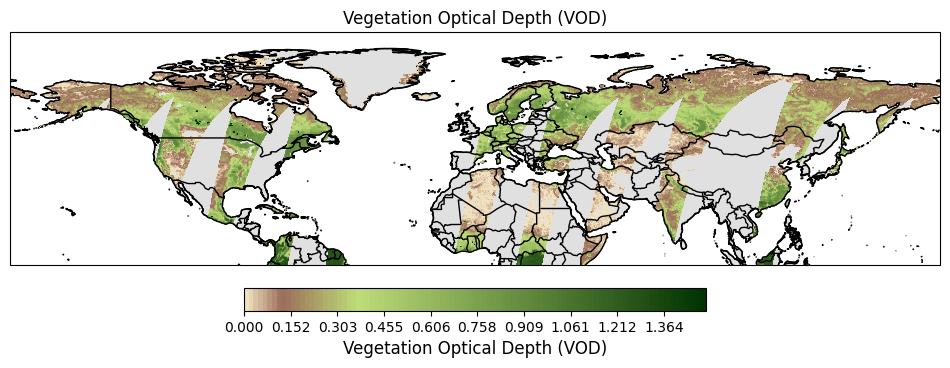

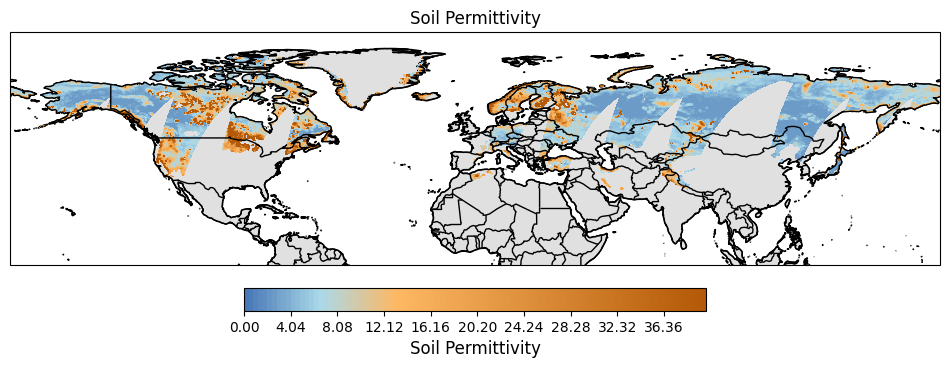

In [4]:
# Visualize Vegetation Optical Depth (VOD)
plot_variable(lat, lon, VOD, cmap_vod, [0, 1.5], 'Vegetation Optical Depth (VOD)')

# Visualize Soil Permittivity
plot_variable(lat, lon, Soil_permittivity, cmap_sp, [0, 40], 'Soil Permittivity')
